In [4]:
import mfpy
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Reading tir file
tir_file = r'samples/sample_52.tir' #Tir file
tir_data = mfpy.preprocessing.read_tir(tir_file)
print(tir_data)

MF52(MDI_HEADER=MDIHeader(FILE_TYPE="'tir'", FILE_VERSION=3.0, FILE_FORMAT="'ASCII'"), UNITS=Units(LENGTH="'meter'", FORCE="'Newton'", ANGLE="'radians'", MASS="'kg'", TIME="'second'"), MODEL=Model(FITTYP=6.0, USE_MODE=14.0, VXLOW=1.0, LONGVL=20.0, TYRESIDE="'Left'"), DIMENSION=Dimension(UNLOADED_RADIUS=0.31, WIDTH=0.2, ASPECT_RATIO=0.6, RIM_RADIUS=0.2, RIM_WIDTH=0.2), VERTICAL=Vertical(FNOMIN=4000.0, VERTICAL_STIFFNESS=200000.0, VERTICAL_DAMPING=50.0, BREFF=8.5, DREFF=0.3, FREFF=0.07), LONG_SLIP_RANGE=LongSlipRange(KPUMIN=-1.0, KPUMAX=1.0), SLIP_ANGLE_RANGE=SlipAngleRange(ALPMIN=-0.2, ALPMAX=0.2), INCLINATION_ANGLE_RANGE=InclinationAngleRange(CAMMIN=-0.1, CAMMAX=0.1), VERTICAL_FORCE_RANGE=VerticalForceRange(FZMIN=1000.0, FZMAX=10000.0), SCALING_COEFFICIENTS=ScalingCoefficients(LFZO=1.0, LCX=1.0, LMUX=1.0, LEX=1.0, LKX=1.0, LHX=1.0, LVX=1.0, LGAX=1.0, LCY=1.0, LMUY=1.0, LEY=1.0, LKY=1.0, LHY=1.0, LVY=1.0, LGAY=1.0, LTR=1.0, LRES=1.0, LGAZ=1.0, LMX=1.0, LVMX=1.0, LMY=1.0, LXAL=1.0, LYKA=

#### Longitudinal slip (alpha = 0)

##### Fz = 5000 N

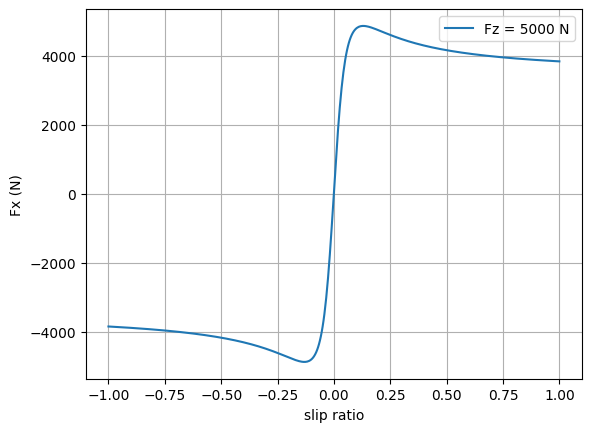

In [6]:
#Inputs
N_points = 500

alpha = np.zeros(N_points) #Slip angle (rad)
kappa = np.linspace(-1,1,N_points) #Slip ratio (%/100) 
Fz = np.ones(N_points)*5000 #Fz (N)
gamma = np.zeros(N_points) #Inclination angle (rad)
Vx = np.ones(N_points)*5 #Longitudinal speed (m/s)

input_values = [alpha, kappa, gamma, Fz, Vx] #input values -> list

result = mfpy.solve(input_values,tir_data,check_limits=False) #Solving

#Graph
fig,ax1 = plt.subplots(1,1)
ax1.set_xlabel('slip ratio')
ax1.set_ylabel('Fx (N)')
ax1.grid()
ax1.plot(result.kappa,result.FX,label='Fz = 5000 N')
ax1.legend()


##### Fz = 500 to 5000 N

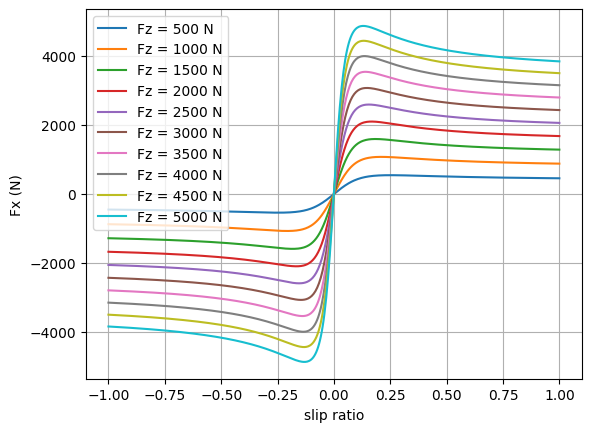

In [7]:
#Inputs
N_points = 500 
alpha = np.zeros(N_points) #Slip angle (rad)
kappa = np.linspace(-1,1,N_points) #Slip ratio (%/100)
gamma = np.zeros(N_points) #Inclination angle (rad)
Vx = np.ones(N_points)*10 #Longitudinal speed (m/s) 

fig,ax1 = plt.subplots(1,1)
ax1.set_xlabel('slip ratio')
ax1.set_ylabel('Fx (N)')
ax1.grid()
for i in range(1,11):
    Fz = np.ones(N_points)*500*i
    input_values = [ alpha, kappa, gamma, Fz, Vx]
    result = mfpy.solve(input_values,tir_data,check_limits=False) #Solving
    ax1.plot(result.kappa,result.FX,label='Fz = {} N'.format(500*i))
ax1.legend()

#### Pure cornering (kappa = 0)

##### Fz = 500 to 5000 N

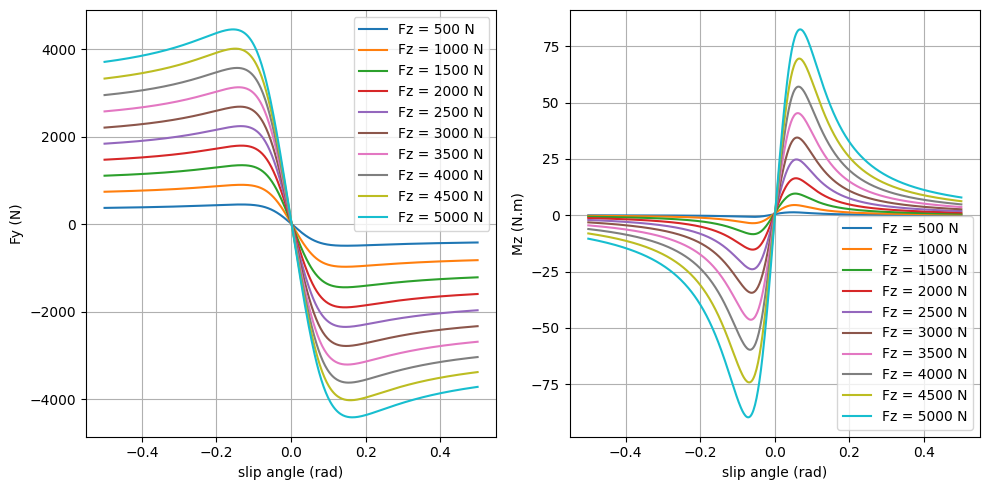

In [8]:
#Inputs
N_points = 500 
alpha = np.linspace(-0.5,0.5,N_points) #Slip angle (rad)
kappa= np.zeros(N_points) #Slip ratio (%/100)
gamma = np.zeros(N_points) #Inclination angle (rad)
Vx = np.ones(N_points)*10 #Longitudinal speed (m/s) 

#Graph
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.set_xlabel('slip angle (rad)')
ax1.set_ylabel('Fy (N)')
ax1.grid()
ax2.set_xlabel('slip angle (rad)')
ax2.set_ylabel('Mz (N.m)')
ax2.grid()
for i in range(1,11):
    Fz = np.ones(N_points)*500*i
    input_values = [ alpha, kappa, gamma, Fz, Vx]
    result = mfpy.solve(input_values,tir_data,check_limits=False) #Solving
    ax1.plot(result.alpha,result.FY,label='Fz = {} N'.format(500*i))
    ax2.plot(result.alpha,result.MZ,label='Fz = {} N'.format(500*i))
ax1.legend()
ax2.legend()
fig.tight_layout()


### Combined (traction circle)

Slip angle input is outside the range value. The result will be saturated
Slip angle input is outside the range value. The result will be saturated
Slip angle input is outside the range value. The result will be saturated
Slip angle input is outside the range value. The result will be saturated
Slip angle input is outside the range value. The result will be saturated
Slip angle input is outside the range value. The result will be saturated
Slip angle input is outside the range value. The result will be saturated
Slip angle input is outside the range value. The result will be saturated
Slip angle input is outside the range value. The result will be saturated
Slip angle input is outside the range value. The result will be saturated
Slip angle input is outside the range value. The result will be saturated
Slip angle input is outside the range value. The result will be saturated
Slip angle input is outside the range value. The result will be saturated
Slip angle input is outside the range 

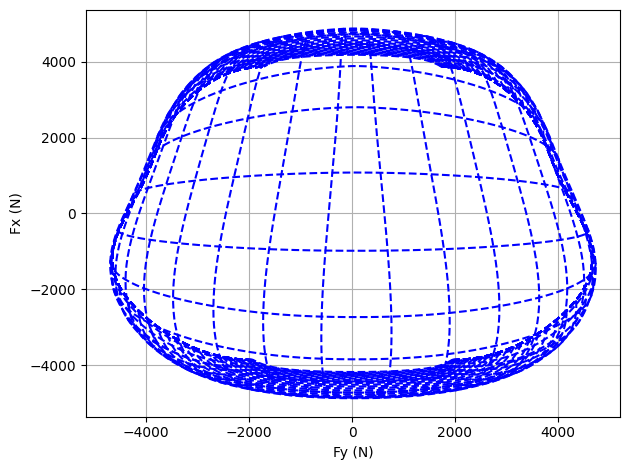

In [9]:
N_points = 500 
Fz = np.ones(N_points)*5000
gamma = np.zeros(N_points) #Inclination angle (rad)
Vx = np.ones(N_points)*10 #Longitudinal speed (m/s) 
alpha = np.linspace(-0.49,0.49,N_points)


fig,ax1 = plt.subplots(1,1)
ax1.set_xlabel('Fy (N)')
ax1.set_ylabel('Fx (N)')
ax1.grid()

for i in np.linspace(-0.49,0.49,50):
    kappa = np.ones(N_points)*i
    input_values = [ alpha, kappa, gamma, Fz, Vx]
    result = mfpy.solve(input_values,tir_data,check_limits=True) #Solving
    ax1.plot(result.FY,result.FX,'b--')

kappa = np.linspace(-0.49,0.49,N_points)
for i in np.linspace(-0.49,0.49,50):
    alpha = np.ones(N_points)*i
    input_values = [ alpha, kappa, gamma, Fz, Vx]
    result = mfpy.solve(input_values,tir_data,check_limits=True) #Solving)
    ax1.plot(result.FY,result.FX,'b--')


fig.tight_layout()

### Available Data

In [10]:
#Inputs
N_points = 500

alpha = np.ones(N_points)*0.1 #Slip angle (rad)
kappa = np.linspace(-1,1,N_points) #Slip ratio (%/100) 
Fz = np.ones(N_points)*5000 #Fz (N)
gamma = np.ones(N_points)*0.1 #Inclination angle (rad)
Vx = np.ones(N_points)*10 #Longitudinal speed (m/s)

input_values = [alpha, kappa, gamma, Fz, Vx] #input values -> list

result = mfpy.solve(input_values,tir_data,check_limits=False) #Solving
print(result._fields)

('alpha', 'kappa', 'gamma', 'VX', 'FX', 'FY', 'muX', 'muY', 'FZ', 'MX', 'MY', 'MZ', 't', 's', 'FX0', 'FY0', 'MZ0', 'MZr0', 't0', 'Re', 'rho', 'omega')
